# MATH 441 Optimization Problems

**February 14, 2024**

## Scheduling Exams

How can we schedule final exams using the fewest time slots such that there are no conflicts and students have at most 1 exam per day?

## Greedy Algorithms

Scheduling is hard! In real-life applications, most schedules are determined by an approximation algorithm. Here are a couple possible ways to construct a feasible solution:

* Sort the courses by size then schedule an exam for each course one at time based on the constraints
* Go down the list of students, for each student schedule their exams (still unscheduled) in available times

## Integer Programming Formulation

**Parameters:**

* There are $s$ time slots per day $k=0,\dots,s-1$
* There are $d$ days in the exam period $l = 0,\dots,d-1$
* There are $n$ students $i = 0,\dots,n-1$
* There are $m$ courses $j = 0,\dots,m-1$
* $C = [c_{ij}]$ where $c_{ij} = 1$ if student $i$ is registered in course $j$

**Decision variables:** Let $x_{jkl} = 1$ if course $j$ is scheduled at time $k$ on day $l$, and 0 otherwise. Let $w_{kl} = 1$ if there is an exam scheduled on day $l$ at time $k$, and 0 otherwise.

**Objective:** Minimize the total number of time slots: $\sum_l \sum_k w_{kl}$

**Constraints:**

Each course has a final exam scheduled during the exam period:

$$
\sum_l \sum_k x_{jkl} = 1 \ , \ \ \text{for each} \ j 
$$

Students can't have more than one exam at the same time on the same day:

$$
\sum_j c_{ij} x_{jkl} \leq w_{kl} \ , \ \ \text{for each} \ i,k,l
$$

Students can only have 1 exam per day:

$$
\sum_k \sum_j c_{ij} x_{jkl} \leq 1  \ ,  \ \ \text{for each} \ i,l
$$

It seems as if the last constraint includes the second and so the second is redundant. However we need the second constraint to include the variables $w_{kl}$ in the formulation.

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Choose values for the parameters:

In [56]:
s = 4
n = 100
m = 20
d = 10

Construct a fake dataset $C$ where each student is registered in between 1 and `maxcourses` courses.

In [57]:
C = np.zeros((n,m))
maxcourses = 6
for i in range(n):
    ncourses = np.random.randint(1,maxcourses+1)
    js = np.random.choice(range(m),size=ncourses,replace=False)
    C[i,js] = 1.

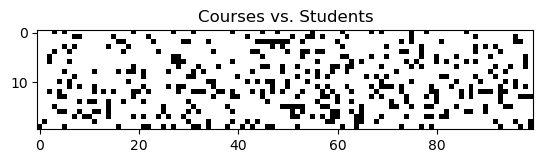

In [58]:
plt.imshow(C.T,cmap='binary'), plt.title("Courses vs. Students")
plt.show()

Define the variable `X` as a list of matrices such that `X[j]` is a $s \times d$ matrix which records when the exam for course $j$ is scheduled.

In [59]:
X = [cp.Variable(shape=(s,d),integer=True) for j in range(m)]

Define matrix $W = [w_{kl}]$:

In [60]:
W = cp.Variable(shape=(s,d),integer=True)

Define the objective function:

In [69]:
objective = cp.Minimize(cp.sum(W))
constraint1 = [cp.sum(X[j]) == 1 for j in range(m)]
constraint2 = []
for i in range(n):
    for k in range(s):
        for l in range(d):
            constraint2 += [cp.sum([C[i,j]*X[j][k,l] for j in range(m)]) <= W[k,l]]
constraint3 = []
for i in range(n):
    for l in range(d):
        constraint3 += [cp.sum([C[i,j]*X[j][k,l] for j in range(m) for k in range(s)]) <= 1]
constraint4 = [X[j] >= 0 for j in range(m)] + [W >= 0, W <= 1]
constraints = constraint1 + constraint2 + constraint3 + constraint4
problem = cp.Problem(objective,constraints)

In [70]:
problem.solve()

inf

In [71]:
problem.status

'infeasible'

In [72]:
W.value

We can't find a feasible solution because our fake dataset is built such that each student takes course $j$ with the same probability when in fact most students take the same courses. We need to construct a dataset which is more realistic to be able to construct an optimial solution.